# Import needed package

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import preprocessing
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

# Load data from CSV file

In [2]:
customer_data = pd.read_csv('data/customer_booking.csv', encoding="ISO-8859-1")

In [3]:
customer_data.head()

,num_passengers,sales_channel,trip_type,purchase_lead,length_of_stay,flight_hour,flight_day,route,booking_origin,wants_extra_baggage,wants_preferred_seat,wants_in_flight_meals,flight_duration,booking_complete
0,2,Internet,RoundTrip,262,19,7,Sat,AKLDEL,New Zealand,1,0,0,5.52,0
1,1,Internet,RoundTrip,112,20,3,Sat,AKLDEL,New Zealand,0,0,0,5.52,0
2,2,Internet,RoundTrip,243,22,17,Wed,AKLDEL,India,1,1,0,5.52,0
3,1,Internet,RoundTrip,96,31,4,Sat,AKLDEL,New Zealand,0,0,1,5.52,0
4,2,Internet,RoundTrip,68,22,15,Wed,AKLDEL,India,1,0,1,5.52,0


In [4]:
customer_data.isnull().sum()

num_passengers           0
sales_channel            0
trip_type                0
purchase_lead            0
length_of_stay           0
flight_hour              0
flight_day               0
route                    0
booking_origin           0
wants_extra_baggage      0
wants_preferred_seat     0
wants_in_flight_meals    0
flight_duration          0
booking_complete         0
dtype: int64

In [5]:
customer_data.dtypes

num_passengers             int64
sales_channel             object
trip_type                 object
purchase_lead              int64
length_of_stay             int64
flight_hour                int64
flight_day                object
route                     object
booking_origin            object
wants_extra_baggage        int64
wants_preferred_seat       int64
wants_in_flight_meals      int64
flight_duration          float64
booking_complete           int64
dtype: object

In [6]:
customer_data.describe()

,num_passengers,purchase_lead,length_of_stay,flight_hour,wants_extra_baggage,wants_preferred_seat,wants_in_flight_meals,flight_duration,booking_complete
count,50000.000000,50000.000000,50000.00000,50000.00000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000
mean,1.591240,84.940480,23.04456,9.06634,0.668780,0.296960,0.427140,7.277561,0.149560
std,1.020165,90.451378,33.88767,5.41266,0.470657,0.456923,0.494668,1.496863,0.356643
min,1.000000,0.000000,0.00000,0.00000,0.000000,0.000000,0.000000,4.670000,0.000000
25%,1.000000,21.000000,5.00000,5.00000,0.000000,0.000000,0.000000,5.620000,0.000000
50%,1.000000,51.000000,17.00000,9.00000,1.000000,0.000000,0.000000,7.570000,0.000000
75%,2.000000,115.000000,28.00000,13.00000,1.000000,1.000000,1.000000,8.830000,0.000000
max,9.000000,867.000000,778.00000,23.00000,1.000000,1.000000,1.000000,9.500000,1.000000


In [7]:
customer_data.describe(include='object')

,sales_channel,trip_type,flight_day,route,booking_origin
count,50000,50000,50000,50000,50000
unique,2,3,7,799,104
top,Internet,RoundTrip,Mon,AKLKUL,Australia
freq,44382,49497,8102,2680,17872


In [8]:
customer_data.value_counts('sales_channel')

sales_channel
Internet    44382
Mobile       5618
Name: count, dtype: int64

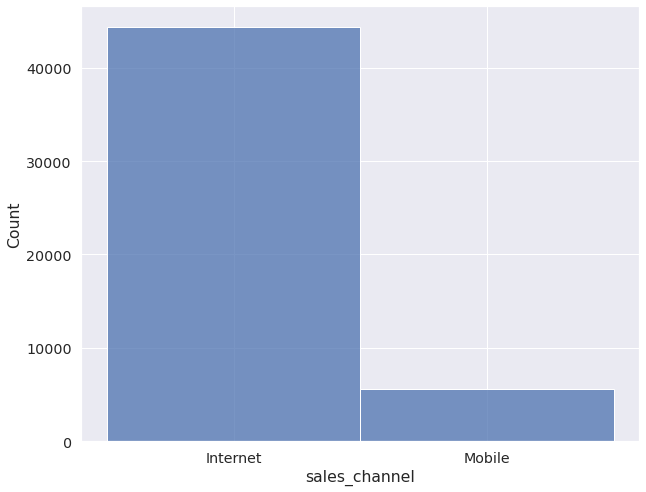

In [9]:
plt.figure(figsize=(10,8))
sns.set(font_scale=1.3)
sns.histplot(data=customer_data, x='sales_channel')
plt.show()

In [10]:
customer_data.value_counts('trip_type')

trip_type
RoundTrip     49497
OneWay          387
CircleTrip      116
Name: count, dtype: int64

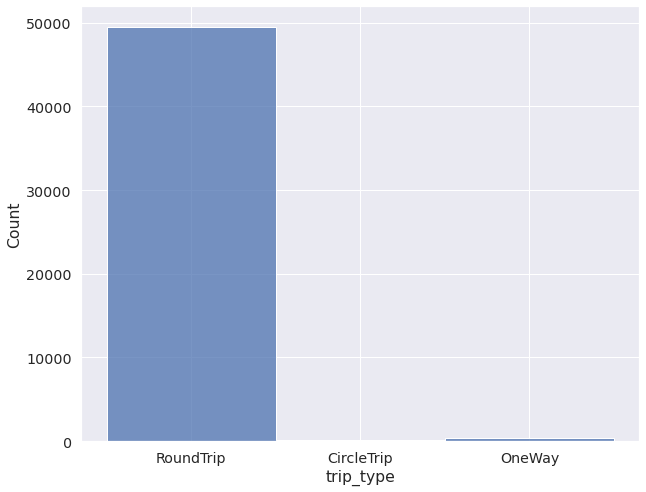

In [11]:
plt.figure(figsize=(10,8))
sns.set(font_scale=1.3)
sns.histplot(data=customer_data, x='trip_type')
plt.show()

In [12]:
customer_data.value_counts('flight_day')

flight_day
Mon    8102
Wed    7674
Tue    7673
Thu    7424
Fri    6761
Sun    6554
Sat    5812
Name: count, dtype: int64

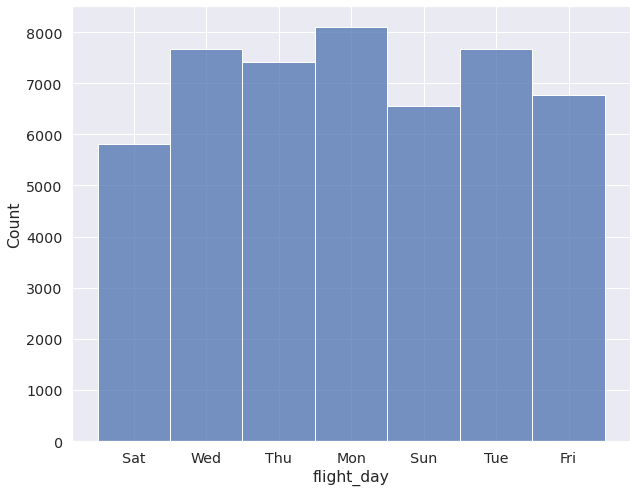

In [13]:
plt.figure(figsize=(10,8))
sns.set(font_scale=1.3)
sns.histplot(data=customer_data, x='flight_day')
plt.show()

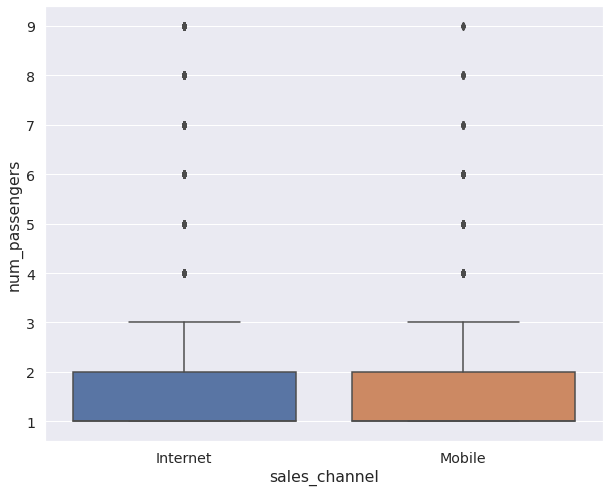

In [14]:
plt.figure(figsize=(10,8))
sns.set(font_scale=1.3)
sns.boxplot(data=customer_data, x='sales_channel', y='num_passengers')
plt.show()

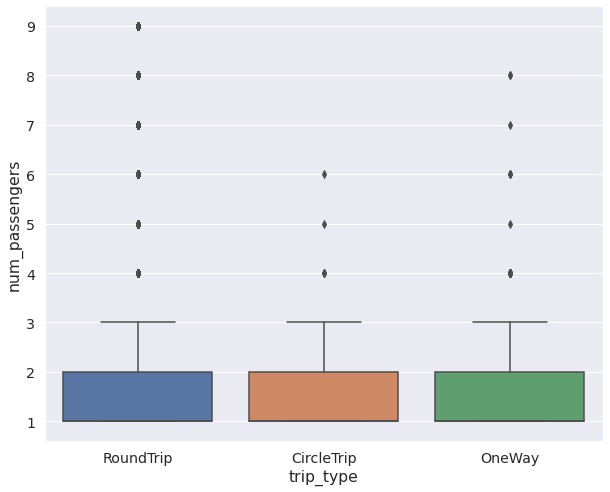

In [15]:
plt.figure(figsize=(10,8))
sns.set(font_scale=1.3)
sns.boxplot(data=customer_data, x='trip_type', y='num_passengers')
plt.show()

In [16]:
customer_data.select_dtypes('number').corr()

,num_passengers,purchase_lead,length_of_stay,flight_hour,wants_extra_baggage,wants_preferred_seat,wants_in_flight_meals,flight_duration,booking_complete
num_passengers,1.000000,0.212606,-0.115850,0.015607,0.120404,0.028544,0.022943,-0.063169,0.024116
purchase_lead,0.212606,1.000000,-0.076560,0.035973,-0.022207,-0.004499,-0.022653,0.067866,-0.022131
length_of_stay,-0.115850,-0.076560,1.000000,-0.024872,0.176757,0.032264,0.098828,0.141181,-0.042408
flight_hour,0.015607,0.035973,-0.024872,1.000000,-0.011434,0.012171,0.013014,-0.002101,0.007127
wants_extra_baggage,0.120404,-0.022207,0.176757,-0.011434,1.000000,0.207669,0.216470,0.057054,0.068139
wants_preferred_seat,0.028544,-0.004499,0.032264,0.012171,0.207669,1.000000,0.315088,0.101289,0.050116
wants_in_flight_meals,0.022943,-0.022653,0.098828,0.013014,0.216470,0.315088,1.000000,0.154312,0.026511
flight_duration,-0.063169,0.067866,0.141181,-0.002101,0.057054,0.101289,0.154312,1.000000,-0.106266
booking_complete,0.024116,-0.022131,-0.042408,0.007127,0.068139,0.050116,0.026511,-0.106266,1.000000


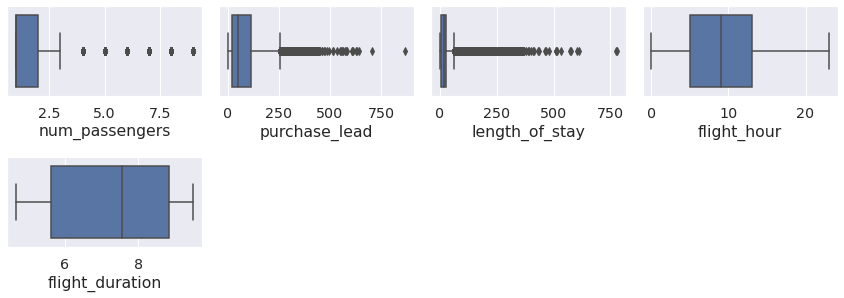

In [17]:
num = ['num_passengers', 'purchase_lead', 'length_of_stay', 'flight_hour', 'flight_duration']
plt.figure(figsize=(12,8))

for i, column in enumerate (customer_data[num].columns, 1):
    plt.subplot(4,4,i)
    sns.boxplot(data=customer_data[num], x=customer_data[column])
    plt.tight_layout()

In [18]:
from scipy import stats
import numpy as np

print(f'Total rows before delete outlier : {len(customer_data)}')

filtered_entries = np.array([True] * len(customer_data))

for col in num:
    zscore = abs(stats.zscore(customer_data[col]))
    filtered_entries = (zscore < 3) & filtered_entries
    customer_data = customer_data[filtered_entries]
    
print(f'Total rows after delete outlier : {len(customer_data)}')

Total rows before delete outlier : 50000
Total rows after delete outlier : 47115


# Feature Transformation

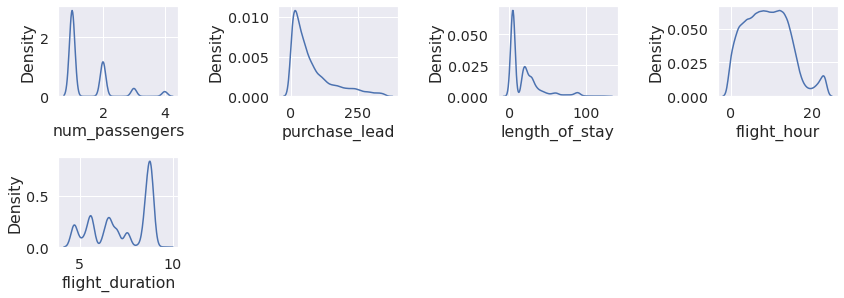

In [19]:
plt.figure(figsize=(12,8))

for i, column in enumerate (customer_data[num].columns, 1):
    plt.subplot(4,4,i)
    sns.kdeplot(data=customer_data[num], x=customer_data[column])
    plt.tight_layout()

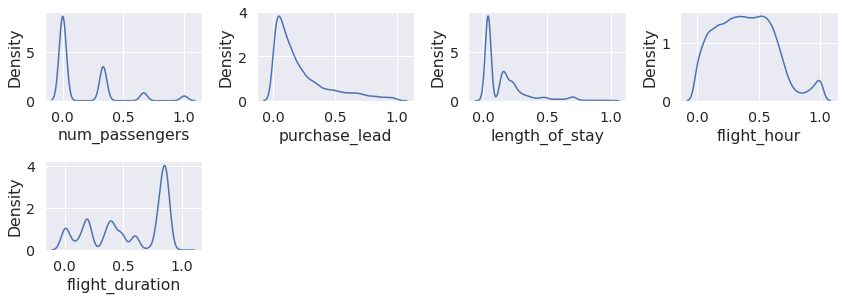

In [20]:
from sklearn.preprocessing import Normalizer

num_max = customer_data[num].max()
num_min = customer_data[num].min()

num_features = (customer_data[num] - num_min) / (num_max - num_min)
num_features.head()

customer_data[num] = num_features

plt.figure(figsize=(12,8))

for i, column in enumerate (customer_data[num].columns, 1):
    plt.subplot(4,4,i)
    sns.kdeplot(data=customer_data, x=customer_data[column])
    plt.tight_layout()

# Feature Encoding

In [21]:
customer_data["flight_day"].unique()

array(['Sat', 'Wed', 'Thu', 'Mon', 'Tue', 'Fri', 'Sun'], dtype=object)

In [22]:
mapping = {
    "Mon": 1,
    "Tue": 2,
    "Wed": 3,
    "Thu": 4,
    "Fri": 5,
    "Sat": 6,
    "Sun": 7,
}

customer_data["flight_day"] = customer_data["flight_day"].map(mapping)

In [23]:
customer_data["flight_day"].unique()

array([6, 3, 4, 1, 2, 5, 7])

In [24]:
from sklearn import preprocessing

label_encode = ['sales_channel']
                
mapping_trip_type = {
    'RoundTrip'  : 0,
    'OneWay'     : 1,
    'CircleTrip' : 2
}               

customer_data['trip_type'] = customer_data['trip_type'].map(mapping_trip_type)

customer_data['sales_channel'] = preprocessing.LabelEncoder() \
                                    .fit_transform(customer_data['sales_channel'])

In [25]:
customer_data.drop(columns=['route', 'booking_origin'], axis=1, inplace=True)

In [26]:
customer_data.head()

,num_passengers,sales_channel,trip_type,purchase_lead,length_of_stay,flight_hour,flight_day,wants_extra_baggage,wants_preferred_seat,wants_in_flight_meals,flight_duration,booking_complete
0,0.333333,0,0,0.742210,0.150794,0.304348,6,1,0,0,0.175983,0
1,0.000000,0,0,0.317280,0.158730,0.130435,6,0,0,0,0.175983,0
2,0.333333,0,0,0.688385,0.174603,0.739130,3,1,1,0,0.175983,0
3,0.000000,0,0,0.271955,0.246032,0.173913,6,0,0,1,0.175983,0
4,0.333333,0,0,0.192635,0.174603,0.652174,3,1,0,1,0.175983,0


# Split Data

In [27]:
from sklearn.model_selection import train_test_split

x = customer_data.drop(columns=['booking_complete'], axis=1)
y = customer_data['booking_complete']

X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

In [28]:
y_train.value_counts(normalize=True)

booking_complete
0    0.851136
1    0.148864
Name: proportion, dtype: float64

# Sampling Data

In [29]:
# !pip install imblearn

In [30]:
from imblearn.over_sampling import SMOTE

sm = SMOTE(random_state = 2)
x_over, y_over = sm.fit_resample(X_train, y_train.ravel())

# Train Machine learning model

In [31]:
from sklearn.metrics import accuracy_score, recall_score, roc_auc_score, precision_score, f1_score
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay

def confusionmatrix(predictions):
    cm = confusion_matrix(y_test, predictions)
    disp = ConfusionMatrixDisplay(confusion_matrix=cm)
    return disp.plot()

def eval_classification(model):
    y_pred = model.predict(X_test)
    y_pred_train = model.predict(x_over)
  
    
    print("Accuracy (Test Set): %.2f" % accuracy_score(y_test, y_pred))
    print("Precision (Test Set): %.2f" % precision_score(y_test, y_pred))
    print("Recall (Test Set): %.2f" % recall_score(y_test, y_pred))
    print("F1-Score (Test Set): %.2f" % f1_score(y_test, y_pred))
    
    print("roc_auc (test-proba): %.2f" % roc_auc_score(y_test, y_pred))
    print("roc_auc (train-proba): %.2f" % roc_auc_score(y_over, y_pred_train))

## Logistic Regression

Accuracy (Test Set): 0.85
Precision (Test Set): 0.00
Recall (Test Set): 0.00
F1-Score (Test Set): 0.00
roc_auc (test-proba): 0.50
roc_auc (train-proba): 0.50


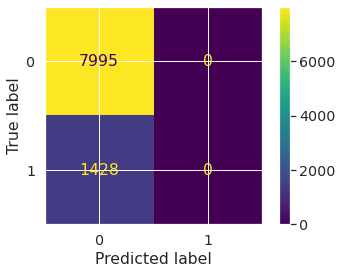

In [32]:
from sklearn.linear_model import LogisticRegression

lr = LogisticRegression()
lr.fit(X_train,y_train)

predictions = lr.predict(X_test)
confusionmatrix(predictions)
eval_classification(lr)

In [33]:
# Jaccard Index to evaluate LR

from sklearn.metrics import jaccard_score

jaccard_score(y_test, predictions, pos_label=0)

0.848455905762496

## Extreme Gradient Boosting

Accuracy (Test Set): 0.84
Precision (Test Set): 0.35
Recall (Test Set): 0.03
F1-Score (Test Set): 0.06
roc_auc (test-proba): 0.51
roc_auc (train-proba): 0.53


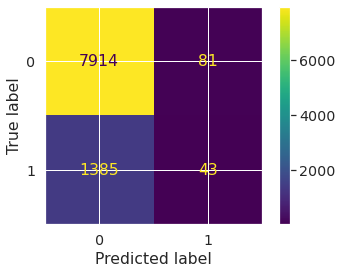

In [34]:
from xgboost import XGBClassifier, plot_importance

clf = XGBClassifier()
clf.fit(X_train, y_train)

predictions = clf.predict(X_test)
confusionmatrix(predictions)
eval_classification(clf)

#### The XGBoost library provides a built-in function to plot features ordered by their importance. The function is called `plot_importance()` and can be used as follows:

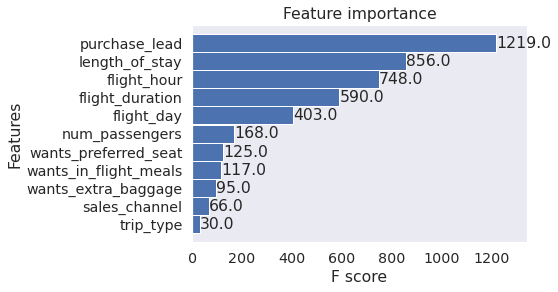

In [35]:
plot_importance(clf, height=0.99, grid=False)
plt.savefig('feature_importance.png', bbox_inches='tight')
plt.show()
plt.close()

# Conclusion

It is apparent that the plot shows `purchase_lead` has the highest importance and `length_of_stay` is also the next feature with highest importance together with `flight_hour`.

On the other hand, `trip_type` has the lowest importance.